# Exploratory data analysis

In [62]:
# Importing key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("bmh")
from sklearn.linear_model import LinearRegression

In [63]:
# Downloading data and checking datasets shape
xtb = pd.read_csv("Data/Raw/xtb_d.csv", index_col="Data", parse_dates=True)
dataset = pd.read_csv("Data/Processed/dataset.csv", index_col="Unnamed: 0", parse_dates=True)

In [64]:
xtb.tail()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2020-10-12,15.50,15.55,15.2,15.3,335319
2020-10-13,15.45,16.35,15.4,16.1,995368
2020-10-14,16.05,17.45,16.0,16.3,1912629
2020-10-15,16.40,16.80,15.6,16.1,632229
2020-10-16,15.90,17.90,15.9,17.8,1215462


In [65]:
dataset.head()

,xtb,wig,spx,gld,oil,usd,vix
2016-05-06,12.05066,46663.67,2057.14,1290.55,44.61,0.87711,14.72
2016-05-09,12.00021,46628.94,2058.69,1265.00,43.27,0.87860,14.57
2016-05-10,11.94016,46178.72,2084.39,1267.45,44.52,0.87946,13.63
2016-05-11,12.05066,46053.07,2064.46,1278.80,45.99,0.87524,14.69
2016-05-12,12.15035,46022.02,2064.11,1264.75,46.44,0.87911,14.41


## XTB general overview

In [66]:
xtb.describe()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
count,1097.000000,1097.000000,1097.000000,1097.000000,1.097000e+03
mean,7.139910,7.297508,6.957892,7.143541,1.743109e+05
std,4.108007,4.266564,3.939253,4.117257,5.598905e+05
min,3.009970,3.099970,2.910000,3.000000,1.000000e+00
25%,4.260030,4.350000,4.209990,4.260030,2.480000e+03
50%,5.580010,5.679960,5.459970,5.599980,1.004100e+04
75%,8.700060,8.950010,8.449990,8.660000,5.936600e+04
max,28.100000,29.300000,27.700000,28.400000,7.570064e+06


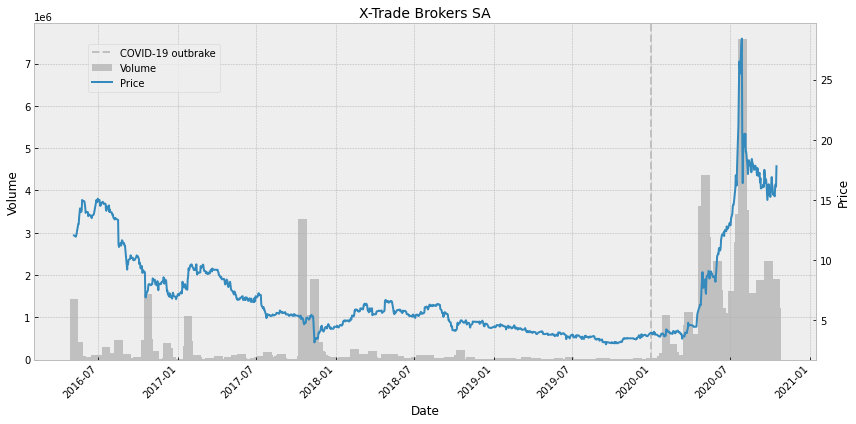

In [67]:
# Plotting the closing price and volume, weekly view
price = xtb.Zamkniecie
volume = xtb.Wolumen

fig, ax = plt.subplots(figsize=(12,6))
fig.autofmt_xdate(rotation=45)

ax.bar(volume.index, volume, color="silver", width=20)
ax.set(xlabel="Date", ylabel="Volume", yscale="linear")
ax.set_title(label="X-Trade Brokers SA", fontsize=14)
ax.axvline("2019-12-30", color="silver", linestyle="--", linewidth=2)

ax2 = ax.twinx()
ax2.plot(price.index, price, linewidth=2)
ax2.set(ylabel="Price", yscale="linear")

fig.legend(["COVID-19 outbrake", "Volume", "Price"], 
           loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.grid()
plt.tight_layout()
plt.show()

<b>Covid-19</b>
<br>A quick look at the chart illustrates how significantly the COVID-19 outbreak has impacted the stock quotations. It is the uncertainty and market volatility caused by COVID-19 that contributed to the unprecedented profit growth in the first quarter of 2020, and as a result, the stock price growth.
<p><b>Volume and price movements</b>
<br>Research on the company also indicates that unprecedented trade volume levels are directly related to the new investors. The majority of them are private individuals with small capital. That could result in above the average price volatility since institutional investors' power is limited and cannot effectively stabilize the price movements. It affects the Machine Learning predictions' credibility as the models do not include human psychological and behavioral factors.

## Data distributions

In [68]:
dataset.describe()

,xtb,wig,spx,gld,oil,usd,vix
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,7.147935,56088.370918,2696.848530,1386.139054,52.591592,0.882126,17.244813
std,4.127727,6139.547389,358.812089,202.680031,10.874471,0.034145,9.118744
min,3.000000,37164.020000,2000.540000,1129.850000,11.570000,0.799730,9.140000
25%,4.257515,51037.007500,2422.482500,1256.075000,46.772500,0.855438,12.120000
50%,5.594960,57899.925000,2723.060000,1308.300000,52.615000,0.886105,14.105000
75%,8.685000,60373.672500,2924.582500,1478.850000,59.292500,0.903415,19.047501
max,28.400000,67529.390000,3580.840000,2058.400000,76.410000,0.962440,82.690002


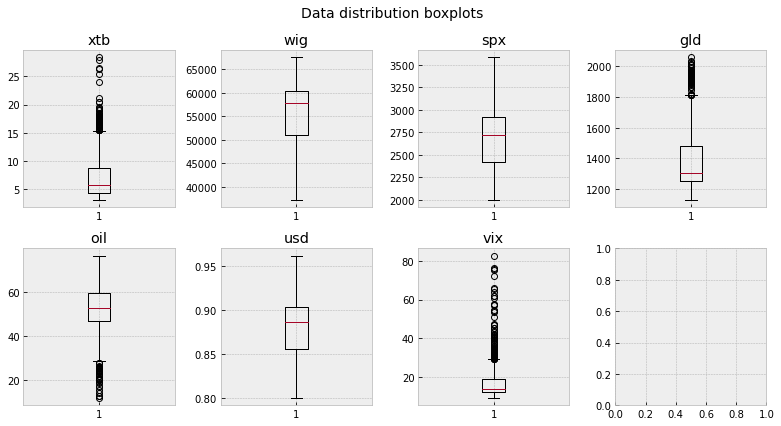

In [69]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(11,6))
fig.suptitle("Data distribution boxplots", fontsize=14)

for ax, col in zip(ax.flatten(), dataset.columns):
    ax.boxplot(dataset[col].values)
    ax.set(title=col)

plt.tight_layout()
plt.show()

Some of the data come from financial products that are highly skewed and very volatile. The high variance and common occurrence of outliers make predictions more difficult, especially for typical linear models. Thus, we can suspect that non-linear algorithms such as decision trees regressors should perform better.

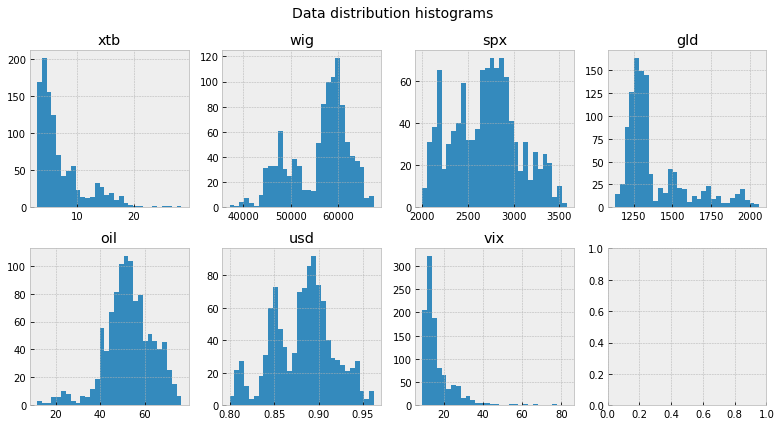

In [70]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(11,6))
fig.suptitle("Data distribution histograms", fontsize=14)

for ax, col in zip(ax.flatten(), dataset.columns):
    ax.hist(dataset[col].values, bins=30)
    ax.set(title=col)

plt.tight_layout()
plt.show()

## Correlations

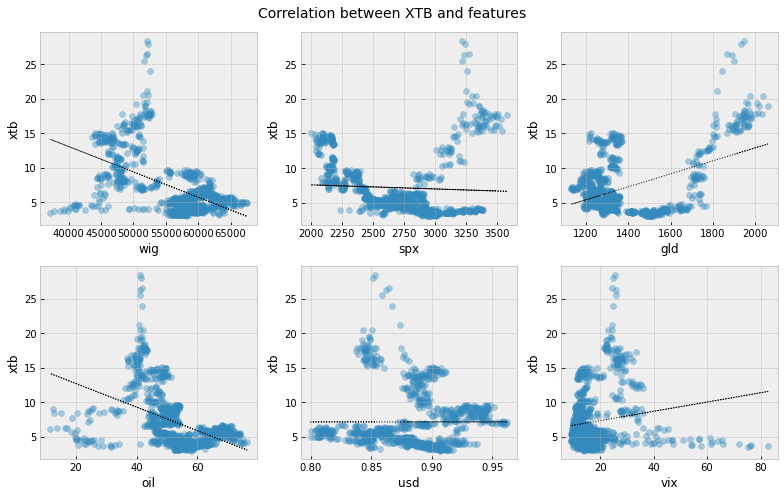

In [71]:
lr = LinearRegression()

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(11,7))
fig.suptitle("Correlation between XTB and features", fontsize=14)

for ax, col in zip(ax.flatten(), dataset.columns[1:]):
    ax.scatter(dataset[col].values, dataset["xtb"].values,alpha=0.4)
    ax.set(xlabel=col, ylabel="xtb")
    
    lr.fit(dataset[col].values.reshape(-1,1), dataset["xtb"].values.reshape(-1,1))
    predictions = lr.predict(dataset[col].values.reshape(-1,1))
        
    ax.plot(dataset[col].values, predictions, color="black", linestyle=":", linewidth=1)

plt.tight_layout()
plt.show()

The correlation between variables does not look like linear and in some cases nonlinear correlation better explains relations between variables i.e. XTB vs GOLD or XTB vs SPX. 

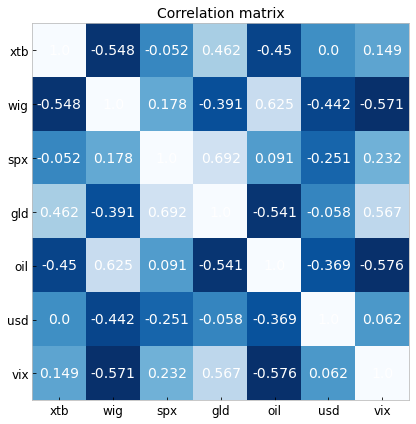

In [72]:
# Correlation between the variables
cor = dataset.corr()

fig,ax =plt.subplots(figsize=(6,6))

ax.imshow(cor, cmap="Blues_r")
ax.set_title("Correlation matrix", fontsize=14)
ax.set_xticks(np.arange(len(cor.columns)))
ax.set_xticklabels(cor.columns, fontsize=12)
ax.set_yticks(np.arange(len(cor.index.values)))
ax.set_yticklabels(cor.index.values, fontsize=12)

for i in range(len(cor.index.values)):
    for c in range(len(cor.columns.values)):
        text = ax.text(i, c, cor.iloc[i,c].round(3), 
                       ha="center", va="center", color="white", fontsize=14)

        plt.grid(False)
plt.tight_layout()
plt.show()

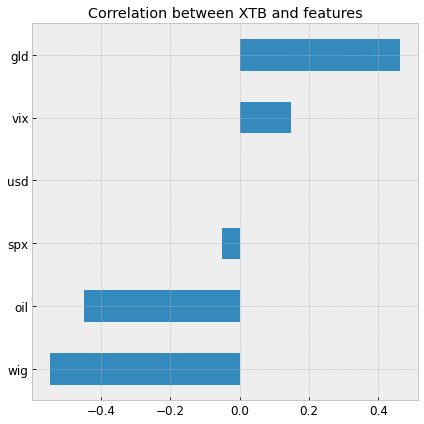

In [73]:
cor.xtb.sort_values(ascending=True)[:-1].plot(kind="barh",
                                         figsize=(6,6),
                                         title="Correlation between XTB and features",
                                         fontsize=12)
plt.tight_layout()
plt.show()